# CNN MODEL FOR PLANTVILLAGE DATASET

BY: Baye T. Asmamaw

# IMPORTING LIBRARIES

In [27]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import os

# to disable all debugging logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# IMPORTING DATASET

In [28]:
dir =os.listdir('PlantVillage')
for filenames in dir:
    print(filenames)

Pepper__bell___Bacterial_spot
Pepper__bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_healthy
Tomato_Late_blight
Tomato_Leaf_Mold
Tomato_Septoria_leaf_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato__Target_Spot
Tomato__Tomato_mosaic_virus
Tomato__Tomato_YellowLeaf__Curl_Virus


In [29]:
#Current_Dir = os.getcwd()
dataset_dir = 'C:\\Users\\baymu\\AppData\\Local\\Programs\\Python\\Python310\\PlantVillage'
print(dataset_dir)

C:\Users\baymu\AppData\Local\Programs\Python\Python310\PlantVillage


# GLOBAL INTIATION OF MODEL PARAMETRES

In [30]:
Image_Size = 256
Batch_Size = 32
Channels = 3
Epochs = 30

# PREPROCESSING

In [31]:
import tensorflow as tf
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir, batch_size = Batch_Size, image_size = (Image_Size, Image_Size), shuffle = True) 

Found 20638 files belonging to 15 classes.


In [32]:
class_name = dataset.class_names
class_name

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [34]:
# Number of Batches = (total number of files belonging to all classes / Batch_Size)
len(dataset)

645

In [35]:
#prints Elements in dataset: here 1st element is image and 2nd index of that image.

print(dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


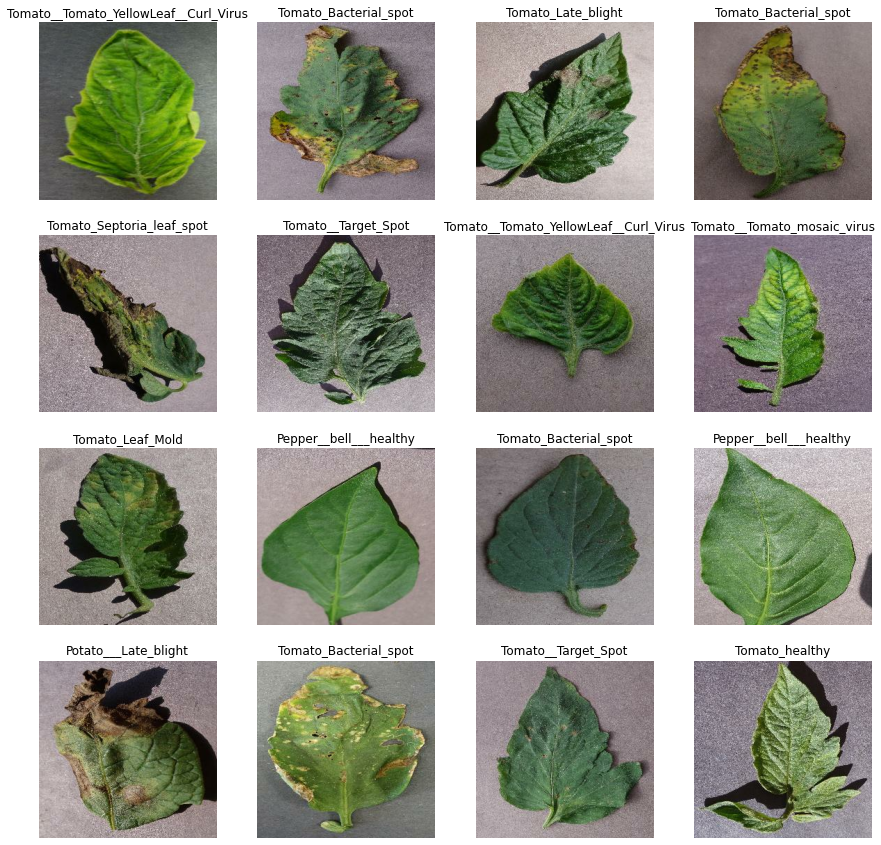

In [36]:
# Plotting the image
plt.figure(figsize = (15,15))
# dataset.take(count) : Creates a Dataset with at most 'count' elements(batch) from the dataset
for image, label in dataset.take(1): 
    for i in range(16):
        plt.subplot(4, 4, i+1) 
        plt.imshow(image[i].numpy().astype('uint8')) #converting all data of image into numpy and than to intiger type as they were in float.
        plt.title(class_name[label[i]])  
        plt.axis("off") 

# SPLITTING DATASET INTO TRAIN, VALIDATION AND TEST SETS

In [37]:
def split_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)
        
    ds_size = len(ds)
    train_size =int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)
    
    return train_ds, val_ds, test_ds

In [38]:
train_data, val_data, test_data = split_dataset(dataset)

In [39]:
print("Size of Data is: {0} \nBatch size of Training Data is:{1}\nBatch size of Val data is:{2}\nBatch size of Test Dast Is:{3} " .format(len(dataset), len(train_data), len(val_data), len(test_data)))

Size of Data is: 645 
Batch size of Training Data is:516
Batch size of Val data is:64
Batch size of Test Dast Is:64 


In [40]:
# caching,shuffle and prefetching the data

train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_da = val_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# IMAGE PREPROCESSING

In [41]:
#Rescaling and Resizing

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size, Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [42]:
#Image augmentation 

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(factor = 0.2)
])

# MODEL BUILDING

In [64]:
# Creating Convolution Layers

input_shape = (Batch_Size, Image_Size, Image_Size, Channels)
model = models.Sequential([
   resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'softmax'),

])


model.build(input_shape = input_shape)

In [65]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_5 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

# MODEL TRAINING 

In [69]:
# Optimizing the model 'SparseCategoricalCrossentropy'=>as there are many categorical classes of data
import keras
model.compile( optimizer = 'adam', 
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits = False), 
    metrics = ['accuracy'])

In [70]:
#Fit the model with training data and also pass validation data
history = model.fit(train_data, epochs = Epochs, batch_size = Batch_Size, verbose = 1, validation_data = val_data)

Epoch 1/30
516/516 [==============================] - 908s 2s/step - loss: 1.5326 - accuracy: 0.5189 - val_loss: 0.9670 - val_accuracy: 0.6826
Epoch 2/30
516/516 [==============================] - 913s 2s/step - loss: 0.8028 - accuracy: 0.7354 - val_loss: 1.0701 - val_accuracy: 0.6445
Epoch 3/30
516/516 [==============================] - 841s 2s/step - loss: 0.5956 - accuracy: 0.8026 - val_loss: 0.6152 - val_accuracy: 0.7954
Epoch 4/30
516/516 [==============================] - 857s 2s/step - loss: 0.4724 - accuracy: 0.8396 - val_loss: 0.5106 - val_accuracy: 0.8369
Epoch 5/30
516/516 [==============================] - 855s 2s/step - loss: 0.4350 - accuracy: 0.8539 - val_loss: 0.6387 - val_accuracy: 0.7915
Epoch 6/30
516/516 [==============================] - 857s 2s/step - loss: 0.3579 - accuracy: 0.8803 - val_loss: 0.5095 - val_accuracy: 0.8325
Epoch 7/30
516/516 [==============================] - 870s 2s/step - loss: 0.3239 - accuracy: 0.8913 - val_loss: 0.4419 - val_accuracy: 0.8540

# MODEL EVALUATION

In [72]:
# Getting the model history to analyse

train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

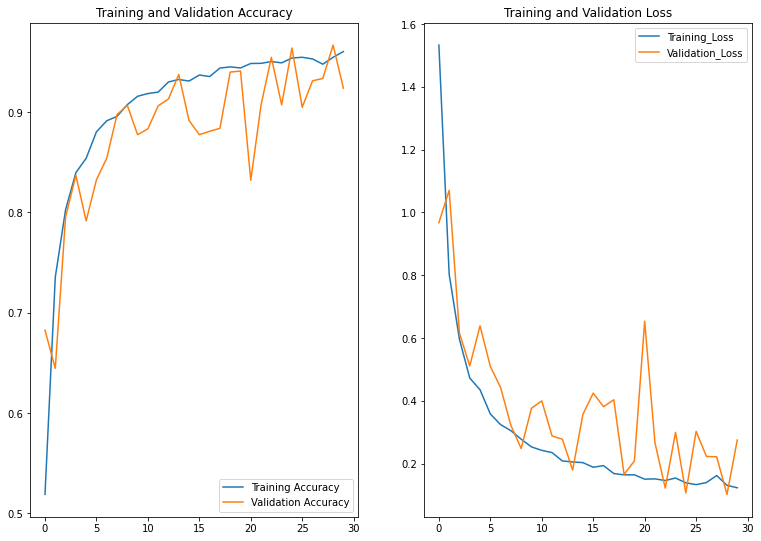

In [73]:
#graphs for accuracy and loss of training and validation data

plt.figure(figsize = (20,20))
plt.subplot(2,3,1)
plt.plot(range(Epochs), train_acc, label = 'Training Accuracy')
plt.plot(range(Epochs), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2,3,2)
plt.plot(range(Epochs), train_loss, label = 'Training_Loss')
plt.plot(range(Epochs), val_loss, label = 'Validation_Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

# SAVING MODEL

In [79]:
model.save('plantvillage.h5')
print("Saving plantvillage model done")

Saving plantvillage model done


# MODEL TESTING WITH NEW DATASET

1/1 [==============================] - 0s 315ms/step


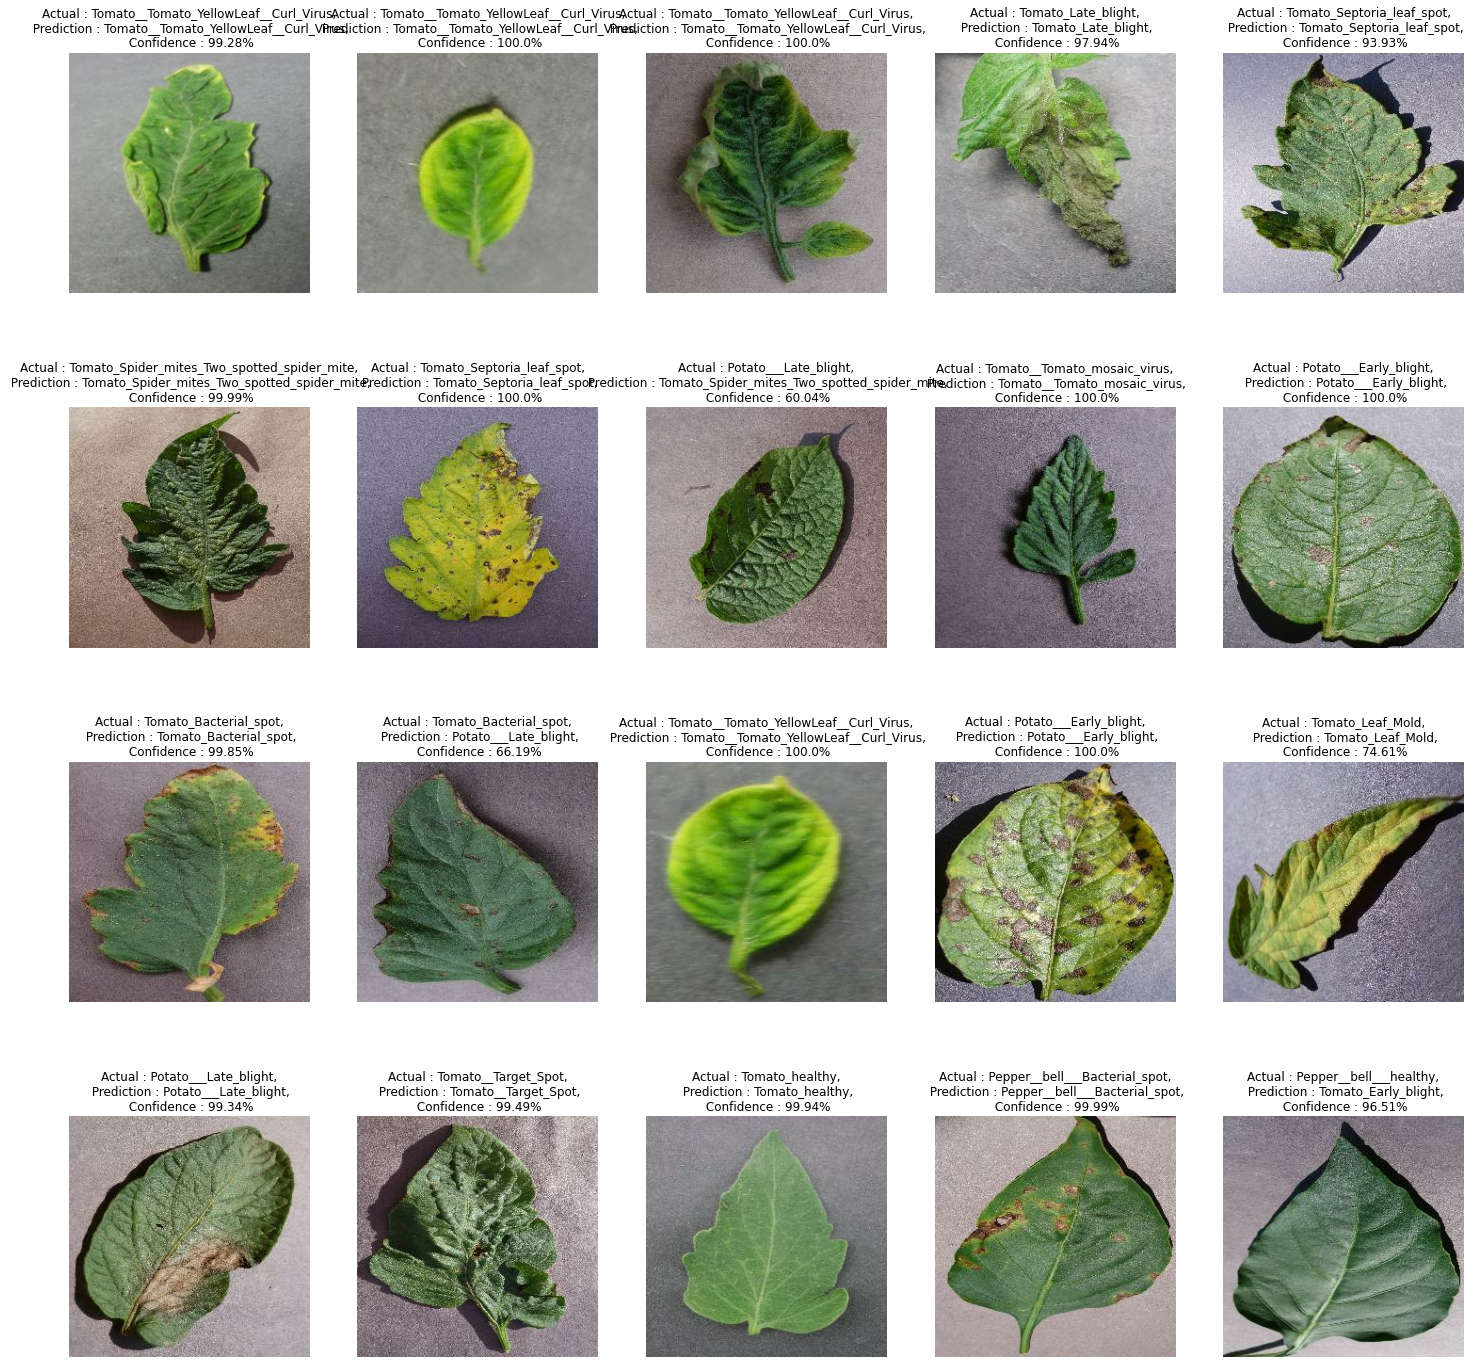

In [78]:
# plotting batch of images with its actual label, predicted label and confidence
plt.figure(figsize = (25, 25))
for batch_image, batch_label in test_data.take(1):
    for i in range(20):
        ax = plt.subplot(4,5,i+1)
        image = batch_image[i].numpy().astype('uint8')
        label = class_name[batch_label[i]]
    
        plt.imshow(image)
    
        batch_prediction = model.predict(batch_image)
        predicted_class = class_name[np.argmax(batch_prediction[i])]
        confidence = round(np.max(batch_prediction[i]) * 100, 2)
        
        plt.title(f'Actual : {label},\n Prediction : {predicted_class},\n Confidence : {confidence}%')
    
        plt.axis('off')
        plt.savefig('plantvillage.png', dpi=600)